In [1]:
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

import os
davinci_plots = '../Figures/DaVinci/'
os.makedirs(davinci_plots,exist_ok=True)

In [2]:
baseline_data = uproot.open('../../Data/06a_DaVinciBaseline/ks0_mass.root:KS0Tuple/DecayTree').arrays(['Ks_MASS'],library='pd')
with_model_data = uproot.open('../../Data/06b_DaVinciModel/ks0_mass.root:KS0Tuple/DecayTree').arrays(['Ks_MASS'],library='pd')

In [6]:
def gaussian_fit_plot(data):
    mass_data = data['Ks_MASS'].dropna()

    # Fit a normal distribution (Gaussian) to the data
    mu, std = norm.fit(mass_data)

    # Plot the histogram
    plt.figure(figsize=(14, 6))
    sns.histplot(mass_data, bins=100, color='skyblue', edgecolor='black', stat='density', label='Mass Data')

    # Plot the fitted Gaussian curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r--', linewidth=2, label=f'Gaussian Fit\nμ = {mu:.3f} MeV/c²\nσ = {std:.3f}')

    # Add vertical line at the fitted mean (mode)
    plt.axvline(mu, color='red', linestyle='--', linewidth=2)

    # Labels, grid, legend
    plt.grid(True, linestyle='--', alpha=0.8)
    plt.xlabel('Invariant Mass of K$_S^0$ [MeV/c²]', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Decay Mass Histogram of $K_S^0$ → π⁺π⁻ with Gaussian Fit', fontsize=14)
    plt.legend()

    plt.tight_layout()
    plt.show()


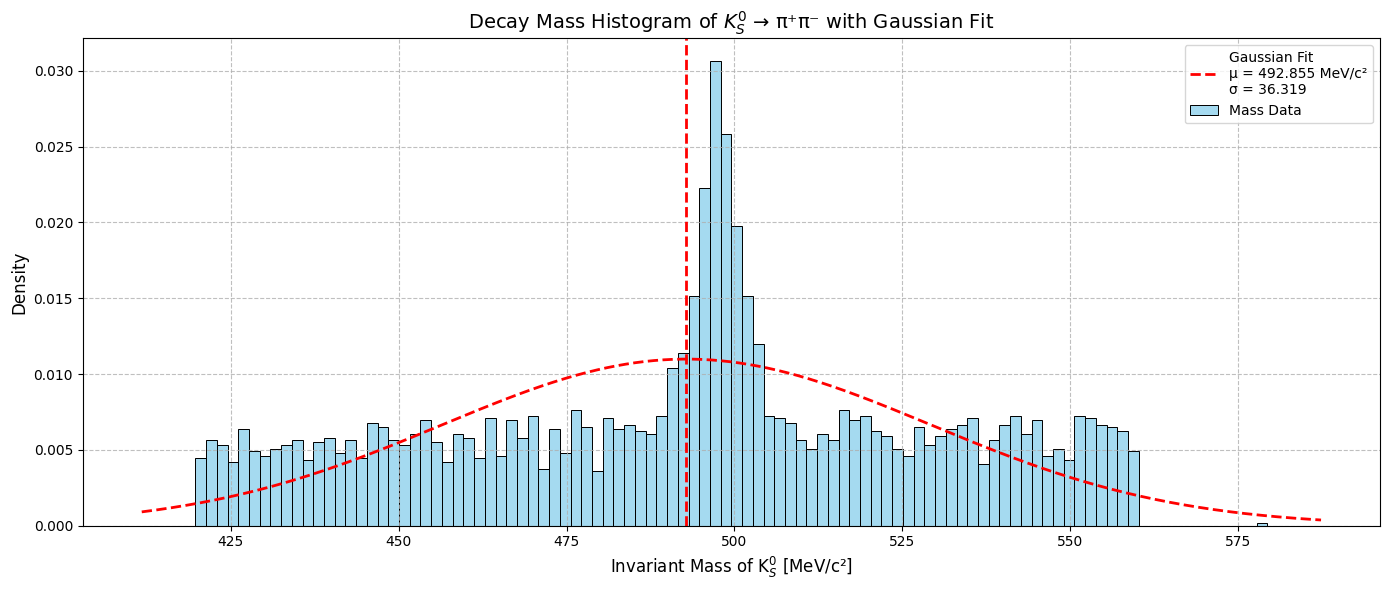

In [7]:
gaussian_fit_plot(baseline_data)

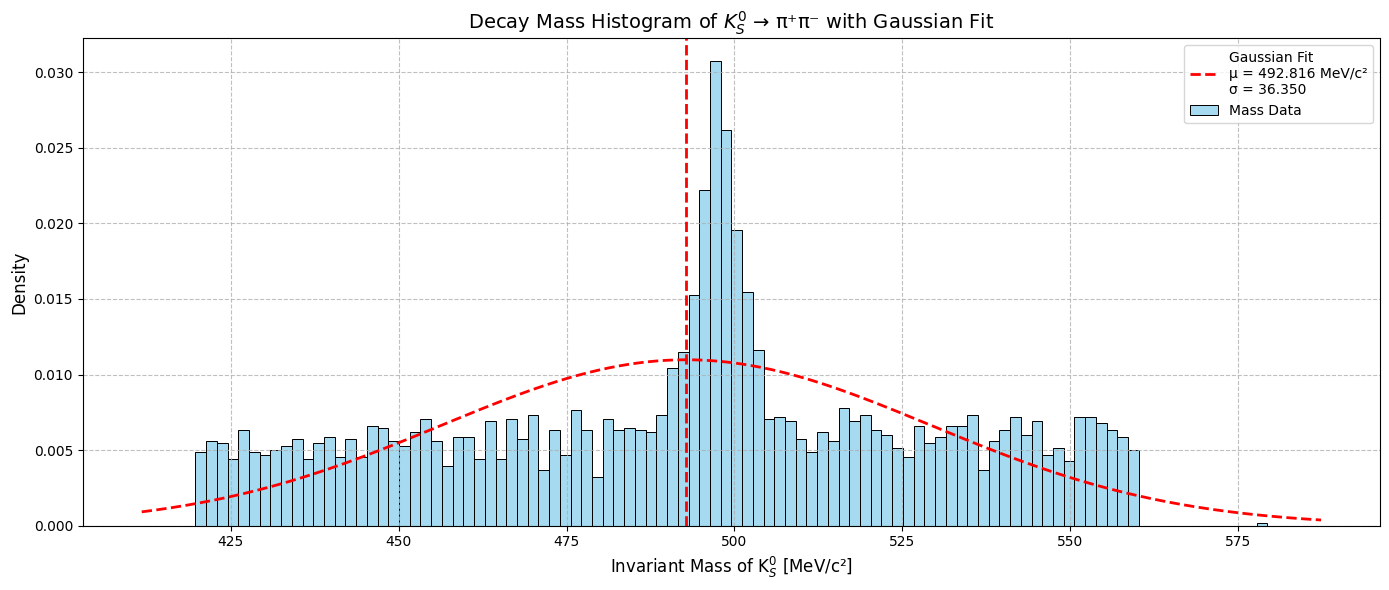

In [8]:
gaussian_fit_plot(with_model_data)